In [2]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.constants import c 
__C_LIGHT_KMS__ = c.to('km/s').value
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=67.74, Om0=0.3089)
import os
plt.style.use(['seaborn-v0_8-deep', os.environ['HOME'] + '/.matplotlib_style/paper.mplstyle'])
import scipy.stats as scs
from pathlib import Path
import sys
sys.path.append('/global/homes/b/bastienc/')
sys.path.append('../scripts/')
import snanapytools as snt
import my_utils as mut
import paper_fun as pf
import flip
KEYS = ['C11', 'G10', 'P21', 'RNDSMEAR']
TRIPP_KEYS = ['alpha', 'beta', 'M_0', 'sigma_M', 'gamma']
PIPPIN_DIR = Path(os.environ['PIPPIN_OUTPUT'])
UCHUU_PATH = Path('/global/homes/b/bastienc/MY_SNANA_DIR/UchuuCatalogs/UchuuDR2_UM/mocks')

[ 000000.00 ]: 08-15 07:32  root            INFO     No pypower module detected, gridding with this method is unavailable
[ 000000.00 ]: 08-15 07:32  root            INFO     Jax is not available, loading numpy and scipy instead


In [3]:
mock = 0    
model = 'P21'
MOCK_DIR = PIPPIN_DIR / f'LSST_UCHUU_MOCK{mock:02d}_BC'
SIM_DIR = MOCK_DIR / '1_SIM' / f'LSST_{model}'
SIM_DIR /= f'PIP_LSST_UCHUU_MOCK00_BC_LSST_{model}'
FIT_DIR =  MOCK_DIR / '2_LCFIT'
UCHUU_MOCKS = UCHUU_PATH / 'mocks_z0p00_zmax0p1739_GalMag_SNANA/'

BBC_DIR = MOCK_DIR / f'6_BIASCOR/LSST_{model}/output'
BBC_FILE = BBC_DIR / f'OUTPUT_BBCFIT/FITOPT000_MUOPT000.FITRES.gz'
FIT_FILE = FIT_DIR /  f'LSST_FIT_LSST_{model}/output/PIP_LSST_UCHUU_MOCK{mock:02d}_BC_LSST_{model}/FITOPT000.FITRES.gz'
bbc = ascii.read(BBC_FILE).to_pandas()
fitres = ascii.read(FIT_FILE).to_pandas()

In [4]:
mock = 0    
model = 'G10'
MOCK_DIR = PIPPIN_DIR / f'LSST_UCHUU_MOCK{mock:02d}_BC'
SIM_DIR = MOCK_DIR / '1_SIM' / f'LSST_{model}'
SIM_DIR /= f'PIP_LSST_UCHUU_MOCK00_BC_LSST_{model}'
FIT_DIR =  MOCK_DIR / '2_LCFIT'
UCHUU_MOCKS = UCHUU_PATH / 'mocks_z0p00_zmax0p1739_GalMag_SNANA/'

BBC_DIR = MOCK_DIR / f'6_BIASCOR/LSST_{model}/output'
BBC_FILE = BBC_DIR / f'OUTPUT_BBCFIT/FITOPT000_MUOPT000.FITRES.gz'
FIT_FILE = FIT_DIR /  f'LSST_FIT_LSST_{model}/output/PIP_LSST_UCHUU_MOCK{mock:02d}_BC_LSST_{model}/FITOPT000.FITRES.gz'

bbc_g10 =  ascii.read(BBC_FILE).to_pandas()

(array([  37.,  299.,  914., 1549., 1553., 1252.,  837.,  513.,  350.,
         228.]),
 array([-0.224329 , -0.1719131, -0.1194972, -0.0670813, -0.0146654,
         0.0377505,  0.0901664,  0.1425823,  0.1949982,  0.2474141,
         0.29983  ]),
 <BarContainer object of 10 artists>)

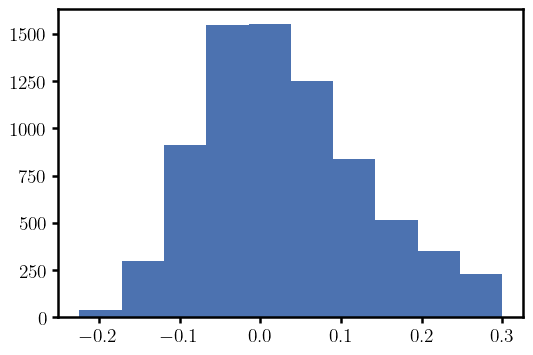

In [5]:
plt.hist(bbc['c'])

In [6]:
len(sbbc) / len(bbc)

NameError: name 'sbbc' is not defined

In [ ]:
sbbc = bbc[bbc['c'].between(-0.2, -0.1)]

sbbc_2 = bbc[bbc['c'].between(0, 0.3)]
hrange = [-0.4, 0.6]

plt.figure(dpi=150)
plt.hist((bbc.MU - 5 * np.log10(cosmo.luminosity_distance(bbc['zHD'].values).value) - 25),
         bins=51, density=True, range=hrange, label='BBC')
plt.hist((bbc_g10.MU - 5 * np.log10(cosmo.luminosity_distance(bbc_g10['zHD'].values).value) - 25) , 
         bins=51, density=True, range=hrange, label='BBC G10')
plt.hist((sbbc.MU - 5 * np.log10(cosmo.luminosity_distance(sbbc['zHD'].values).value) - 25), 
         bins=51, density=True, histtype='step', range=hrange, label='BBC c $<$ 0')
plt.hist((sbbc_2.MU - 5 * np.log10(cosmo.luminosity_distance(sbbc_2['zHD'].values).value) - 25), 
         bins=51, density=True, histtype='step', range=hrange, label='BBC c $>$ 0');
plt.legend(loc = 'upper left', fontsize=9)

In [ ]:
hrange = [-5, 5]

plt.figure(dpi=150)
plt.hist((bbc.MU - 5 * np.log10(cosmo.luminosity_distance(bbc['zHD'].values).value) - 25) / bbc['MUERR'],
         bins=51, density=True, range=hrange, label='BBC')
plt.hist((bbc_g10.MU - 5 * np.log10(cosmo.luminosity_distance(bbc_g10['zHD'].values).value) - 25) / bbc_g10['MUERR'] , 
         bins=51, density=True, range=hrange, label='BBC G10')
plt.hist((sbbc.MU - 5 * np.log10(cosmo.luminosity_distance(sbbc['zHD'].values).value) - 25) / sbbc['MUERR'], 
         bins=51, density=True, histtype='step', range=hrange, label='BBC c $<$ 0')
plt.hist((sbbc_2.MU - 5 * np.log10(cosmo.luminosity_distance(sbbc_2['zHD'].values).value) - 25) / sbbc_2['MUERR'], 
         bins=51, density=True, histtype='step', range=hrange, label='BBC c $>$ 0');
plt.legend(loc = 'upper left', fontsize=9)
xth = np.linspace(-5, 5, 1000)
plt.plot(xth, scs.norm().pdf(xth), c='k', alpha=0.6)

In [ ]:
fig, ax = plt.subplots(dpi=200)
mut.plots.plot_density(bbc['HOST_LOGMASS'].values, bbc['SIM_x1'].values, xrange=[7.5, 12], yrange=[-5, 5], bins_2d=31, ax=ax, add_txt='', 
                               levels=[0.25, 0.5, 0.75, 0.9], smooth=1.5, color='C2');

In [ ]:
plt.hist((bbc['MU'] - 5 * np.log10(cosmo.luminosity_distance(bbc['zHD'].values).value) - 25) / bbc['MUERR'], bins='rice', density=True);
plt.hist((bbc['MU'] - 5 * np.log10(cosmo.luminosity_distance(bbc['zHD'].values).value) - 25) / bbc['MUERR'], bins='rice', density=True);

xth = np.linspace(-5, 5, 1000)
plt.plot(xth, scs.norm().pdf(xth), c='k', alpha=0.6);

In [ ]:
Mrange = [7.5, 12.5]
nbins=51
plt.figure(dpi=150)
plt.hist(fitres['HOST_LOGMASS'],range=Mrange, density=True,bins=nbins, histtype='stepfilled',label='Sim. SN Ia hosts' )
plt.hist(full_mock.LOGMASS, range=Mrange, density=True, bins=nbins, histtype='step', lw=1.5, color='C4',label='Uchuu catalog' )
plt.xlabel('$\log M / M_\odot$')
plt.xlim(*Mrange)
plt.legend()
plt.savefig('../Figures/Host_Massdist.pdf',dpi=None, bbox_inches='tight' );

In [ ]:
# Set up the Mollweide projectionD
fig = plt.figure(figsize=(8, 5), dpi=150)
ax = fig.add_subplot(111, projection='mollweide')
# Generate some example data
p = ax.scatter(*np.radians([fitres['HOST_RA'] - 180, fitres['HOST_DEC']]), c=fitres['SIM_VPEC'],
           cmap='RdBu_r' ,s=0.5, vmin=-600, vmax=600, alpha=0.5)
cbar = fig.colorbar(p, fraction=0.02, label='$v_p$ [km s$^{-1}$]')
cbar.ax.set_ylabel(cbar.ax.get_ylabel(), fontsize=15)
# Customize the ticks
ticks = np.linspace(-120, 120, 5)  # Original tick positions
tick_labels = [f"{np.round(t):.0f}°" for t in ticks]  # Convert to degrees

# Set the custom ticks
ax.set_xticks(np.radians(ticks))
ax.set_xticklabels(tick_labels);
plt.savefig('../Figures/sn_loc.png', dpi=400, bbox_inches='tight')

In [ ]:
len(fitres['HOST_R

In [ ]:
# Set up the Mollweide projectionD
fig = plt.figure(figsize=(8, 5), dpi=150)
ax = fig.add_subplot(111, projection='mollweide')
# Generate some example data
p = ax.scatter(*np.radians([bbc['HOST_RA'] - 180, bbc['HOST_DEC']]), c=bbc['SIM_VPEC'],
           cmap='RdBu_r' ,s=0.5, vmin=-600, vmax=600, alpha=0.5)
cbar = fig.colorbar(p, fraction=0.02, label='$v_p$ [km s$^{-1}$]')
cbar.ax.set_ylabel(cbar.ax.get_ylabel(), fontsize=15)
# Customize the ticks
ticks = np.linspace(-120, 120, 5)  # Original tick positions
tick_labels = [f"{np.round(t):.0f}°" for t in ticks]  # Convert to degrees

# Set the custom ticks
ax.set_xticks(np.radians(ticks))
ax.set_xticklabels(tick_labels);
plt.savefig('../Figures/sn_loc_bbc.png', dpi=400, bbox_inches='tight')

In [ ]:
len(fitres['zHD'])

In [ ]:
plt.figure(dpi=150)

plt.hist(fitres['zHD'], bins=31, range=[0.01,0.16]);
plt.xlim(0.01, 0.16)
plt.xlabel('$z_\mathrm{obs}$', fontsize=16)
plt.savefig('z.png', dpi=300, bbox_inches='tight')

# Parameters dist

In [ ]:
from snanapytools import utils as ut
import matplotlib.colors as mpc
import matplotlib.cm as cm

## RND, G10, C11

In [ ]:
plt.figure(dpi=150)
for g in par['EBV'].groupby('LOGMASS'):
    if g[0] == 9.0 or g[0] ==14:
        print(g[1]['EBV'].min())
        t = g[1].sort_values('EBV')
        tnorm = np.trapz(t['PROB'], x=t['EBV'])
        plt.plot(t['EBV'], t['PROB'] / tnorm, label=g[0])
        
for g in par_mod['EBV'].groupby('LOGMASS'):
    if g[0] == 9.0 or g[0]==14:
        print(g[1]['EBV'].min())
        t = g[1].sort_values('EBV')
        tnorm = np.trapz(t['PROB'], x=t['EBV'])
        plt.plot(t['EBV'], t['PROB'] / tnorm, label=str(g[0]) + ' mod', ls='--')


#xth = np.linspace(0, 1.5, 500)
#plt.plot(xth, scs.expon.pdf(xth, scale=0.15), c='C4', alpha=0.5, label='highM') 
#xth = np.linspace(0, 1.5, 500)
#plt.plot(xth, scs.expon.pdf(xth, scale=0.00001), c='C3', alpha=0.5, label='lowM') 

#plt.plot(xth, scs.expon.pdf(xth, scale=0.5 * 0.12), c='C3', alpha=0.5, label='lowM') 

plt.legend()

In [ ]:
new_par['GENSIGMA_SALT2BETA']

In [ ]:
from scipy.special import comb, factorial, kn
from scipy.stats import norm, truncnorm, expon
def approx_dist_betac(x, mu_b, sig_b, mu_c, sig_c, N=30):
    dist = np.exp(-0.5 * ((mu_b / sig_b)**2 + (mu_c / sig_c)**2))
    sum_fact = np.zeros_like(x)
    for n in range(N + 1):
        for m in range(2 * n + 1):
            term = comb(2 * n, m) 
            term *= mu_b**m * mu_c**(2 * n - m) 
            term /= np.pi * factorial(2 * n) * sig_b**(n + m + 1) * sig_c**(3 * n - m + 1)
            term *= x**(2 * n - m) * np.abs(x)**(m - n) * kn(m - n, np.abs(x) / (sig_b * sig_c))
            sum_fact += term
    return dist * sum_fact

In [ ]:
import seaborn as sns
# Beta * cint
mu_b, sig_b = 1.98, 0.35
dist_b = norm(mu_b, sig_b)
mu_c, sig_c = -0.084, 0.042
dist_c = norm(mu_c, sig_c)

# (Rv + 1) * EBV
mu_Rv = 2
sig_Rv = 1.4
min_Rv = 0.5
a_Rv = (min_Rv - mu_Rv) / sig_Rv
dist_Rv = truncnorm(a=a_Rv, b= np.inf, loc=mu_Rv, scale=sig_Rv)
tau_EBV = 0.17
dist_EBV = expon(scale=tau_EBV)

beta_salt = 3.12

N = 100000

beta =  dist_b.rvs(N)
c_int = dist_c.rvs(N)
betac = beta * c_int
Rv = dist_Rv.rvs(N)
EBV = dist_EBV.rvs(N)
RvEBV = (Rv + 1) * EBV
xth = np.linspace(-1, 1, 200)
plt.figure(figsize=(8, 6))

sns.kdeplot(betac, gridsize=300, bw_adjust=1.5, label='betac');
sns.kdeplot(RvEBV, gridsize=300, bw_adjust=1.5, label='RvEBV');
sns.kdeplot(betac+ RvEBV , gridsize=300, bw_adjust=1.5, label='tot');
sns.kdeplot(betac+ RvEBV + np.random.normal(scale=0.3, size=N), gridsize=300, bw_adjust=1.5, label='tot + noise');


plt.xlim(-1, 4)
plt.legend()
#sns.kdeplot(betac_noise, gridsize=100, bw_adjust=1.5);


In [ ]:
a = 1.22020
b = '.6f'
f"{a:{b}}"

In [ ]:
count

In [ ]:
vmin = np.min([np.min(list(mass_grp_c.groups.keys())), np.min(list(mass_grp_x1.groups.keys()))])
vmax = np.max([np.max(list(mass_grp_c.groups.keys())), np.max(list(mass_grp_x1.groups.keys()))])
norm = mpc.Normalize(vmin=vmin, vmax=vmax)
cmap = plt.cm.viridis 
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for colorbar, even if no data is associated


# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 6), dpi=150)


# Plot the first subplot
for g in mass_grp_x1:
    ax1.plot(g[1].SALT2x1, g[1].PROB, c=cmap(norm(g[0])))
    
ax1.set_xlabel("$x_1$", fontsize=18)
ax1.set_ylabel(r'$\mathcal{P}$', fontsize=18)

# Plot the second subplot
for g in mass_grp_c:
    ax2.plot(g[1].SALT2c, g[1].PROB, c=cmap(norm(g[0])))
    
ax2.set_xlabel("$c$", fontsize=18)
ax2.set_xlim(-0.4,0.5)

# Add a horizontal colorbar below the plots
cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation="horizontal", fraction=0.05, pad=10)
cbar.set_label(r"$\log M / M_\odot$",  fontsize=18)

fig.subplots_adjust(wspace=0., bottom=0.25) 
plt.savefig('dist.pdf', dpi=300)

## P23

In [ ]:
file = os.environ['SNDATA_ROOT'] + '/models/population_pdf/DES-SN5YR/DES-SN5YR_LOWZ_S3_P21.DAT.gz'
par = snt.tools.read_wgtmap(file)

mass_grp_x1 = par['SALT2x1'].groupby('LOGMASS')
mass_grp_rv = par['RV'].groupby('LOGMASS')
mass_grp_ebv = par['EBV'].groupby('LOGMASS')

In [ ]:
plt.figure(dpi=200)
g = mass_grp_ebv.get_group(5)
for gz in g.groupby('ZTRUE'):
    plt.plot(gz[1].EBV, gz[1].PROB)
    
plt.xlim(0, 0.4)

In [ ]:
g1.PROB.values == g2.PROB.values

In [ ]:
gz.groups.keys()


In [ ]:
gz.get_group(0.1).groupby

In [ ]:
c_th = np.linspace(-0.5, 0.5, 10000)
P = np.interp(c_th, par['SALT2c'].SALT2c.values, par['SALT2c'].PROB.values)
P /= np.trapz(P, x=c_th) 

mu = np.trapz(P * c_th, x=c_th) 
mu2 = np.trapz(P * c_th**2, x=c_th) 
print(mu)
print(np.sqrt(mu2 - mu**2))

In [ ]:
vmin = np.min([np.min(list(mass_grp_c.groups.keys())), np.min(list(mass_grp_x1.groups.keys()))])
vmax = np.max([np.max(list(mass_grp_c.groups.keys())), np.max(list(mass_grp_x1.groups.keys()))])
norm = mpc.Normalize(vmin=vmin, vmax=vmax)
cmap = plt.cm.viridis 
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for colorbar, even if no data is associated


# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(2, 2, sharey=True, figsize=(10, 8), dpi=150)


# Plot the first subplot
for g in mass_grp_x1:
    ax1[0].plot(g[1].SALT2x1, g[1].PROB, c=cmap(norm(g[0])))
    
ax1[0].set_xlabel("$x_1$", fontsize=15)
ax1[0].set_ylabel(r'$\mathcal{P}$', fontsize=15)

# Plot the second subplot
ax1[1].plot(par['SALT2c'].SALT2c, par['SALT2c'].PROB)
    
ax1[1].set_xlabel("$c$", fontsize=15)

# Plot the first subplot
for g in mass_grp_rv:
    ax2[0].plot(g[1].RV, g[1].PROB, c=cmap(norm(g[0])))

ax2[0].set_xlabel("$R_V$", fontsize=15)
ax2[0].axvline(3.25)
ax2[0].axvline(3.25+0.93)
ax2[0].axvline(1.66)

ax2[0].set_ylabel(r'$\mathcal{P}$', fontsize=15)


# Plot the first subplot
for g in mass_grp_ebv:
    i = 0
    for gg in g[1].groupby('ZTRUE'):
        ax2[1].plot(gg[1].EBV, gg[1].PROB, c=cmap(norm(g[0])), label=f'z={gg[0]}')
        i+=1
        
ax2[0].set_xlabel("$R_V$", fontsize=15)
ax2[0].set_ylabel(r'$\mathcal{P}$', fontsize=15)
plt.legend()

# Add a horizontal colorbar below the plots
cbar = fig.colorbar(sm, ax=[*ax2], orientation="horizontal", fraction=0.08, pad=0.5)
cbar.set_label(r"$\log M / M_\odot$",  fontsize=15)

fig.subplots_adjust(wspace=0., bottom=0.2,) 

In [ ]:
from astropy.constants import c as ast_c

_CLIGHT_KMS_ = ast_c.to('km/s').value

In [ ]:
_CLIGHT_KMS_ * 0.12 * 0.17 * np.log(10) / 5

In [ ]:
from astropy.io import fits

In [ ]:
d= fits.open('/pscratch/sd/d/desctd/PIPPIN_OUTPUT/LSST_UCHUU_MOCK07_BBC_BC/1_SIM/LSST_RNDSMEAR_BBC/PIP_LSST_UCHUU_MOCK07_BBC_BC_LSST_RNDSMEAR_BBC/PIP_LSST_UCHUU_MOCK07_BBC1977b_SNIaMODEL00-0001_HEAD.FITS.gz')

In [ ]:
plt.hist(d[1].data['SIM_SALT2alpha'])

In [ ]:
plt.hist(d[1].data['SIM_SALT2beta']);

In [ ]:
len(d[1].data['SIM_SALT2beta'])

In [ ]:
sim.head[sim.head['NOBS'] > 50]

In [ ]:
pippin = snt.PIPPIN_READER('LSST_UCHUU_MOCK00_BC')
sim = pippin.get_sim('LSST_RNDSMEAR')

In [ ]:
sim.head[sim.head['NOBS']>50]

In [ ]:
sim.head.columns.values

In [ ]:
sim.head.loc[176831]

In [ ]:
import sncosmo as snc

In [ ]:
sn = sim.get_sn_phot(176831)

In [ ]:
SALT = snc.SALT3Source(modeldir='/global/homes/b/bastienc/MY_SNANA_DIR/LSST_SNANA/PaperBBCVpec/Figures/SALT3.DES5YR')

In [ ]:
M = snc.Model(SALT)
M.set(z=sim.head.loc[176831]['SIM_REDSHIFT_HELIO'], 
      t0=sim.head.loc[176831]['SIM_PEAKMJD'],
      x0=sim.head.loc[176831]['SIM_SALT2x0'],
      x1=sim.head.loc[176831]['SIM_SALT2x1'],
      c=sim.head.loc[176831]['SIM_SALT2c'])


In [ ]:
lc[1].SIM_MAGOBS

In [ ]:
fig, ax = plt.subplots(dpi=200)
for lc in sn.groupby('BAND'):
    cl = None
    band = lc[0].strip()
    if band == 'LSST-g':
        print('SLT')
        cl='C1'
    elif band == 'LSST-r':
        cl='C2'
    elif band == 'LSST-i':
        cl='C4'
    elif band == 'LSST-u':
        cl='C0'
    elif band == 'LSST-z':
        cl='C3'
    ax.errorbar(lc[1].MJD, lc[1].FLUXCAL, yerr=lc[1].FLUXCALERR, fmt='o', mew=2, label=lc[0].lower(), c=cl, mfc='white', ms=5)
    
ax.spines[['right', 'top']].set_visible(False)

ax.set_yticks([])
ax.set_xticks([])
ax.legend()
ax.set_ylabel('Flux')
ax.set_xlabel('Time')
plt.savefig('lc.png', dpi=300)

In [ ]:
results_models_path = Path('../results_p21_var//')


In [ ]:

res_models = []
for f in sorted(results_models_path.glob('*_nojax.csv')):
    res_models.append(pd.read_csv(f, index_col=0))
resdf = pd.concat(res_models, keys=np.arange(8))
grp_models = resdf.groupby('model')


In [ ]:
grp_models

In [ ]:
mock = 0

MOCK_DIR = PIPPIN_DIR / f'LSST_UCHUU_MOCK{mock:02d}_BC'

BBC_DIR = MOCK_DIR / '6_BIASCOR'
FIT_DIR =  MOCK_DIR / '2_LCFIT'
zrange = [0.02, 0.1]

# Open files
data_fit = {}
par_fit = {}
par_BBC = {}
data_bbc = {}
for k, g in grp_models:
    sg = g.loc[mock]

    # BBC DATA
    BBC_FILE = BBC_DIR / f'LSST_{k}/output/OUTPUT_BBCFIT/FITOPT000_MUOPT000.FITRES.gz'
    df_BBC = ascii.read(BBC_FILE).to_pandas().set_index('CIDint')
    
    # STANDARD DATA
    FIT_FILE = FIT_DIR /  f'LSST_FIT_LSST_{k}/output/PIP_LSST_UCHUU_MOCK{mock:02d}_BC_LSST_{k}/FITOPT000.FITRES.gz'
    df_STDFIT = ascii.read(FIT_FILE).to_pandas().set_index('CID')
    df_STDFIT = df_STDFIT.loc[df_BBC.index]
    
    mask = ((df_BBC["HOST_NMATCH"] > 0) & (df_BBC['zHD'].between(zrange[0], zrange[1])) & (df_STDFIT.apply(pf.positive_def, axis=1))).values
  
    df_BBC = df_BBC[mask]
    df_STDFIT = df_STDFIT[mask]
    df_STDFIT = df_STDFIT.apply(pf.x0_to_mB_err, axis=1)
    
    data_bbc[k] = flip.data_vector.basic.VelFromHDres(
        {
            "ra": np.deg2rad(df_BBC['HOST_RA'].values),
            "dec": np.deg2rad(df_BBC['HOST_DEC'].values),
            "dmu": df_BBC['MU'].values - cosmo.distmod(df_BBC['zCMB'].values).value,
            "dmu_error": df_BBC['MUERR'].values,
            "zobs": df_BBC['zCMB'].values,
            "rcom_zobs": cosmo.comoving_distance(df_BBC["zCMB"].values).value * cosmo.h,
            "hubble_norm": 100 * cosmo.efunc(df_BBC["zCMB"].values),
            "x1": df_BBC["x1"].values,
            "c": df_BBC["c"].values,
            "mb": df_BBC['mB'].values ,
            "vtrue": df_BBC['SIM_HOSTLIB_VPEC'].values
        }, 
        vel_estimator="full"
        )
    
    par_BBC[k] = {'M_0': sg['M_0_BBC'].values[0]}


    data_fit[k] = flip.data_vector.snia_vectors.VelFromSALTfit({
        "ra": np.deg2rad(df_STDFIT['HOST_RA'].values),
        "dec": np.deg2rad(df_STDFIT['HOST_DEC'].values),
        "mb": df_STDFIT['mB'].values ,
        "x1": df_STDFIT["x1"].values,
        "c": df_STDFIT["c"].values,
        "e_mb": df_STDFIT["mBERR"].values,
        "e_x1": df_STDFIT["x1ERR"].values,
        "e_c": df_STDFIT["cERR"].values,
        "cov_mb_x1": df_STDFIT["COV_mB_x1"].values,
        "cov_mb_c": df_STDFIT["COV_mB_c"].values,
        "cov_x1_c": df_STDFIT["COV_x1_c"].values,
        "zobs": df_STDFIT["zCMB"].values,
        "rcom_zobs": cosmo.comoving_distance(df_STDFIT["zCMB"].values).value * cosmo.h,
        "hubble_norm": 100 * cosmo.efunc(df_STDFIT["zCMB"].values),
        "host_logmass": df_STDFIT["HOST_LOGMASS"].values,
        "vtrue": df_STDFIT['SIM_HOSTLIB_VPEC'].values,
        }, 
        vel_estimator="full", 
        h=cosmo.h)

    par_fit[k] = {tk: sg[tk+ '_STDFIT'].values[0] for tk in TRIPP_KEYS}

mock_dic = {
      'BBC':  data_bbc, 
      'STDFIT': data_fit, 
      'STDFIT_par': par_fit,
      'BBC_par': par_BBC
        }

In [ ]:
dmu_BBC = {}
dmuerr_BBC = {}
dmu_STDFIT = {}
dmuerr_STDFIT = {}
for k in mock_dic['BBC']:
    dmu_BBC[k] = mock_dic['BBC'][k].data['dmu'] - mock_dic['BBC_par'][k]['M_0']
    dmuerr_BBC[k] = mock_dic['BBC'][k].data['dmu_error']

    dmu_STDFIT[k] = mock_dic['STDFIT'][k].compute_distance_modulus_difference(mock_dic['STDFIT_par'][k])
    dmuerr_STDFIT[k] = np.sqrt(mock_dic['STDFIT'][k].compute_observed_distance_modulus_variance(mock_dic['STDFIT_par'][k]))


In [ ]:
plt.figure(dpi=150)
plt.scatter(mock_dic['STDFIT']['P21'].data['zobs'], dmu_STDFIT['P21'], s=5,
            c=mock_dic['STDFIT']['P21'].data['c'],vmin=-0.25, vmax=0.25, cmap='coolwarm')
plt.axhline(0, ls='--', c='k')
plt.ylim(-0.5, 0.5)
plt.xlim(0.015, 0.105)

In [ ]:
plt.figure(dpi=150)
plt.scatter(mock_dic['BBC']['P21'].data['zobs'], dmu_BBC['P21'], s=5,
            c=mock_dic['BBC']['P21'].data['c'],vmin=-0.25, vmax=0.25, cmap='coolwarm')
plt.axhline(0, ls='--', c='k')
plt.ylim(-0.5, 0.5)
plt.xlim(0.015, 0.105)